In [1]:
from matplotlib import pyplot as plt
import matplotlib as mp
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import sklearn.manifold
from scipy import cluster
import seaborn as sns
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
import requests
import json
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
import re
%matplotlib inline

In [6]:
restaurants = {}
names=[]
with open('yelp_academic_dataset_business.json') as data:
    for i in data:
        d = json.loads(i)
        if (d['city']=='Las Vegas'):
            if ('Restaurants' in d['categories']):
                restaurants[d['business_id']] = {'latitude':d['latitude'], 'longitude':d['longitude']}
                names.append(d['name'])
restaurants

{'ZV1uiya7_lBfoZoU-FJSMg': {'latitude': 36.1148582, 'longitude': -115.1316866},
 'btp0v0Qk7CmOmuMdt3aqkQ': {'latitude': 36.1046486, 'longitude': -115.1727668},
 '5-pCgZuFz1ru54RHAfSvsw': {'latitude': 36.1939353942871,
  'longitude': -115.191902160645},
 '-5biAn5qQYk3X5NYlA98pw': {'latitude': 36.143672, 'longitude': -115.1409598},
 '1hS8zXsdHse71i-LwJb8gw': {'latitude': 36.0802774714467,
  'longitude': -115.135656677171},
 'GH24nKQEuoBf-SvLlim8rQ': {'latitude': 36.0106875, 'longitude': -115.1371278},
 '0jq5ZFLRqAAujEuymdPu4g': {'latitude': 36.1118867698559,
  'longitude': -115.173276190096},
 '_Ck4AAtkBLsDL9Qcbo9h1Q': {'latitude': 36.08564777067,
  'longitude': -115.119425881625},
 '--jFTZmywe7StuZ2hEjxyA': {'latitude': 36.1188189268328,
  'longitude': -115.18200516700699},
 'Ni9aqkG_fNWrH02VNlRhLQ': {'latitude': 36.1001831, 'longitude': -115.138668},
 'kePxkm183BDiOiDcsjgAhg': {'latitude': 36.2651489, 'longitude': -115.2595274},
 'KC_QQkMAQUGr1-0W9yObtg': {'latitude': 36.1250583, 'long

In [5]:
bId = []
long = []
lat = []

for x, y in restaurants.items():
    bId.append(x)
    long.append((y.get('longitude')))
    lat.append((y.get('latitude')))
long = np.array(long)
lat = np.array(lat)

print(long)
print(lat)

[-115.1316866  -115.1727668  -115.19190216 ..., -115.156929   -115.145281
 -115.14259481]
[ 36.1148582   36.1046486   36.19393539 ...,  36.1150238   36.17145
  36.14248752]


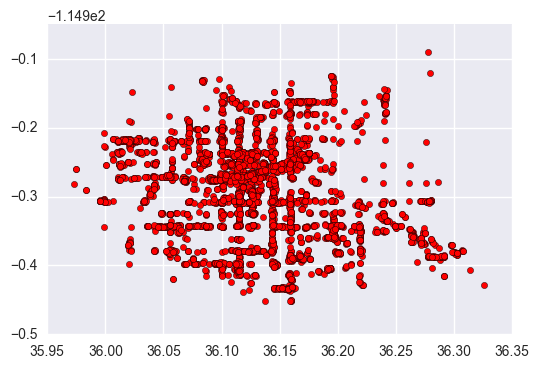

In [7]:
for x in range(len(lat)):
    plt.scatter(lat[x], long[x], c='red', s=20)

In [17]:
df = pd.read_csv('Restaurant_Inspections.csv',header=0)
df = df[df.City == 'Las Vegas']
df = (df[df['Inspection Result'] == 'Closed with Fees']).append(df[df['Inspection Result'] == 'Closed without Fees'])

df

#with open ('Resaurant_Inspections.csv') as file:
#   for line in file:
#      if (line[6]=='Las Vegas' && line[]

C:\Users\Kailen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Serial Number,Permit Number,Restaurant Name,Location Name,Category Name,Address,City,State,Zip,Current Demerits,...,Inspection Time,Employee ID,Inspection Type,Inspection Demerits,Inspection Grade,Permit Status,Inspection Result,Violations,Record Updated,Location 1
1253,DA0061047,PR0000342,Circle K Store #5395 - Deli,CIRCLE K FOOD STORE/UNOCAL #5395,Snack Bar,1140 E Charleston Blvd,Las Vegas,Nevada,89104-1558,0,...,04/05/2010 09:05:00 AM,EE7000846,Routine Inspection,17,X,NaN,Closed with Fees,121631113,02/21/2013 10:26:12 PM,"(36.1587362, -115.1374846)"
2883,DA0116147,PR0002702,Scoundrels Pub,Scoundrels Pub Rest & Bar,Bar / Tavern,4360 S Decatur Blvd,Las Vegas,Nevada,89103-6862,6,...,06/24/2010 02:40:00 PM,EE7000956,Routine Inspection,20,X,NaN,Closed with Fees,131415313537113,02/21/2013 10:26:12 PM,"(36.110606, -115.20743)"
3122,DA0128153,PR0003362,7-Eleven #20687 - Deli,7-Eleven Food Store #20687,Snack Bar,1600 N Rancho Dr,Las Vegas,Nevada,89106-1019,6,...,02/24/2011 03:30:00 PM,EE7000327,Routine Inspection,24,X,NaN,Closed with Fees,NaN,02/21/2013 10:26:12 PM,"(36.1888969, -115.1857917)"
3647,DA0181522,PR0004094,Mad Matty's Bar,Mad Matty's,Bar / Tavern,8100 W Sahara Ave,Las Vegas,Nevada,89117-2069,3,...,06/24/2010 02:00:00 PM,EE7000374,Routine Inspection,22,X,NaN,Closed with Fees,141621273638112114,02/21/2013 10:26:12 PM,"(36.1442586, -115.2683054)"
3661,DA0182418,PR0004095,Mad Matty's Restaurant,Mad Matty's,Restaurant,8100 W Sahara Ave,Las Vegas,Nevada,89117-2069,3,...,06/24/2010 03:00:00 PM,EE7000374,Routine Inspection,15,X,NaN,Closed with Fees,1637112114,02/21/2013 10:26:12 PM,"(36.1442586, -115.2683054)"
4046,DA0215026,PR0004852,EXCALIBUR WALKWAY PORT BAR,EXCALIBUR HOTEL & CASINO,Portable Unit,3850 S Las Vegas Blvd,Las Vegas,Nevada,89109-4324,0,...,08/20/2010 03:15:00 PM,EE7000487,Routine Inspection,17,X,NaN,Closed with Fees,121325313637112,02/21/2013 10:26:12 PM,"(36.0987307, -115.175777)"
4070,DA0216662,PR0004841,CHEETAHS BEER BAR,CHEETAHS BAR,Beer Bar,2112 Western Ave,Las Vegas,Nevada,89102-4614,5,...,05/20/2010 01:00:00 PM,EE7000390,Routine Inspection,10,X,NaN,Closed with Fees,133164,02/21/2013 10:26:12 PM,"(36.1478492, -115.1658636)"
4094,DA0217939,PR0004974,HARRAHS PARTY TIME BAR,HARRAHS LV HOTEL & CASINO,Bar / Tavern,3475 S Las Vegas Blvd,Las Vegas,Nevada,89109-8922,0,...,06/08/2011 09:00:00 AM,EE7000333,Routine Inspection,35,X,NaN,Closed with Fees,NaN,02/21/2013 10:26:12 PM,"(36.1193098, -115.1717702)"
5068,DA0282819,PR0006566,Irene's Kitchen,Irene's,Restaurant,5480 Spring Mountain Rd,Las Vegas,Nevada,89146-8732,3,...,08/13/2010 02:45:00 PM,EE7000594,Routine Inspection,3,X,NaN,Closed with Fees,223137,02/21/2013 10:26:12 PM,"(36.1262764, -115.2161853)"
5070,DA0282821,PR0006566,Irene's Kitchen,Irene's,Restaurant,5480 Spring Mountain Rd,Las Vegas,Nevada,89146-8732,3,...,01/21/2011 02:40:00 PM,EE7000594,Routine Inspection,13,X,NaN,Closed with Fees,NaN,02/21/2013 10:26:12 PM,"(36.1262764, -115.2161853)"


In [24]:
coords = df['Location 1']
for line in coords:
    lat = line[1:8]

(36.1587362, -115.1374846)
(36.110606, -115.20743)
(36.1888969, -115.1857917)
(36.1442586, -115.2683054)
(36.1442586, -115.2683054)
(36.0987307, -115.175777)
(36.1478492, -115.1658636)
(36.1193098, -115.1717702)
(36.1262764, -115.2161853)
(36.1262764, -115.2161853)
(36.1302757, -115.1084305)
(36.144667, -115.298872)
(36.144017, -115.193618)
(36.0907541, -115.1766701)
(36.1220839, -115.1680316)
(36.1220839, -115.1680316)
(36.1871099, -115.114709)
(36.127175, -115.197924)
(36.1284886, -115.1783046)
(36.1226902, -115.1701939)
(36.158841, -115.1212644)
(36.1226902, -115.1701939)
(36.196696, -115.053217)
(36.125908, -115.197904)
(36.1299863, -115.0905569)
(36.1029162, -115.1697555)
(36.125908, -115.197904)
(36.1001236, -115.2266403)
(36.098909, -115.175557)
(36.09741, -115.208124)
(36.100269, -115.100479)
(36.1107323, -115.1722365)
(36.1055504, -115.1514447)
(36.126579, -115.193423)
(36.1325407, -115.1553299)
(36.197022, -115.061916)
(36.197022, -115.061916)
(36.1054255, -115.1505356)
(36.0